In [1]:
import sys
import json
import pprint
from IPython.display import display

import numpy as np
import torch
from datasets import load_dataset

sys.path.append("../")
from src import Predictor

In [2]:
model_log_dir = "../model_logs"
restore_version = "train_240315151243"

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
dataset = load_dataset("naver-clova-ix/cord-v1")["validation"]

In [5]:
predictor = Predictor.from_pretrained(model_log_dir, restore_version, device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
dash_line = "-".join(" " for _ in range(100))

In [7]:
def resize_image_aspect_ratio(image, target_size):
    width, height = image.size
    aspect_ratio = width / height

    if width < height:
        new_width = target_size
        new_height = round(new_width / aspect_ratio)
    else:
        new_height = target_size
        new_width = round(new_height * aspect_ratio)

    resized_image = image.resize((new_width, new_height))

    return resized_image

In [8]:
def visualize_data(image, prediction, ground_truth):
    image = resize_image_aspect_ratio(image, 400)
    ground_truth = json.loads(ground_truth)
    gt_parsed = ground_truth["gt_parse"]
    
    print(dash_line)
    print("IMAGE:\n")
    display(image)
    print(dash_line)
    print("PREDICTIONS:\n")
    pprint.pprint(prediction)
    print(dash_line)
    print("GROUND TRUTH:\n")
    pprint.pprint(gt_parsed)
    print(dash_line)

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 1
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
IMAGE:



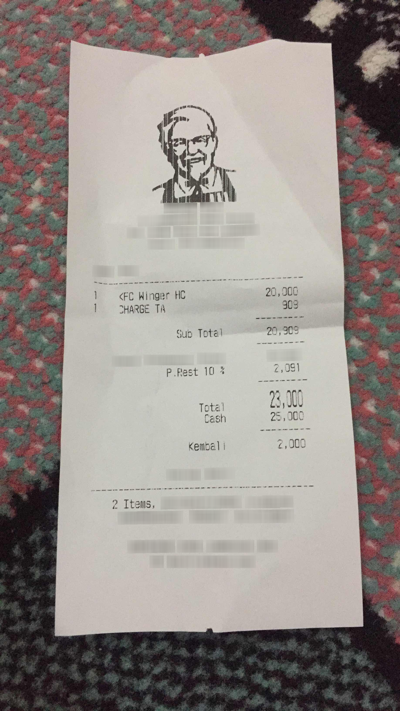

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PREDICTIONS:

{'menu': [{'cnt': '1', 'nm': '<FC Winger HC', 'price': '20,000'},
          {'cnt': '1', 'nm': 'CHARGE TA', 'price': '909'}],
 'sub_total': {'subtotal_price': '23,000'},
 'total': {'cashprice': '25,000',
           'changeprice': '2,000',
           'total_price': '23,000'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
GROUND TRUTH:

{'menu': [{'cnt': '1', 'nm': '<FC Winger HC', 'price': '20,000'},
          {'cnt': '1', 'nm': 'CHARGE TA', 'price': '909'}],
 'sub_total': {'subtotal_price': '20,909', 'tax_price': '2,091'},
 'total': {'cashprice': '25,000',
           'changeprice': '2,000',
           'menuqty_cnt': '2',
   

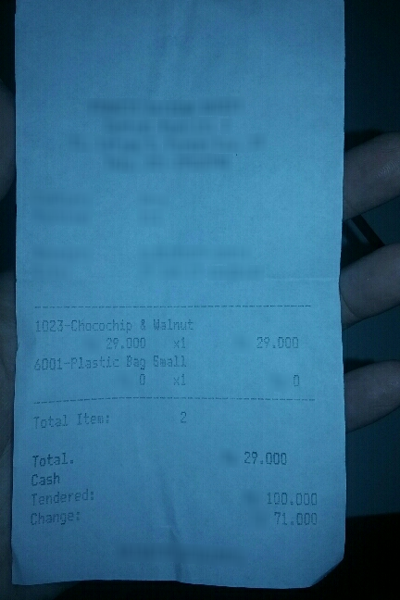

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PREDICTIONS:

{'menu': [{'cnt': 'x 1',
           'nm': '1023-Chocochip & Walnut',
           'price': '29.000',
           'unitprice': '29.000'},
          {'cnt': 'x 1',
           'nm': '6001-Plastic Bag Small',
           'price': '0',
           'unitprice': '0'}],
 'total': {'cashprice': '100.000',
           'changeprice': '71.000',
           'menuqty_cnt': '2',
           'total_price': '29.000'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
GROUND TRUTH:

{'menu': [{'cnt': 'x1',
           'nm': 'Chocochip & Walnut',
           'num': '1023-',
           'price': '29.000',
           'unitprice': '29.000'},
          {'cnt': '

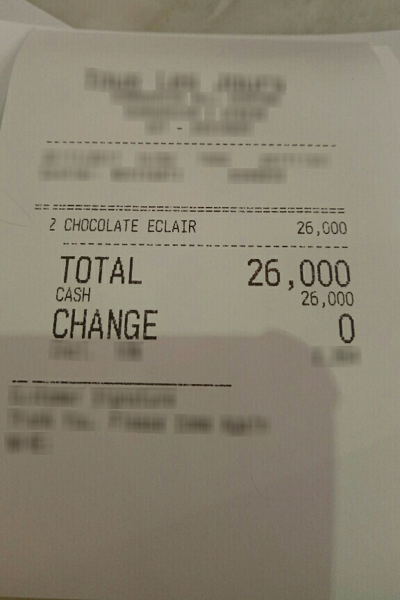

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PREDICTIONS:

{'menu': {'cnt': '2', 'nm': 'CHOCOLATE ECLAIR', 'price': '26,000'},
 'total': {'cashprice': '26,000', 'changeprice': '0', 'total_price': '26,000'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
GROUND TRUTH:

{'menu': {'cnt': '2', 'nm': 'CHOCOLATE ECLAIR', 'price': '26,000'},
 'total': {'cashprice': '26,000', 'changeprice': '0', 'total_price': '26,000'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

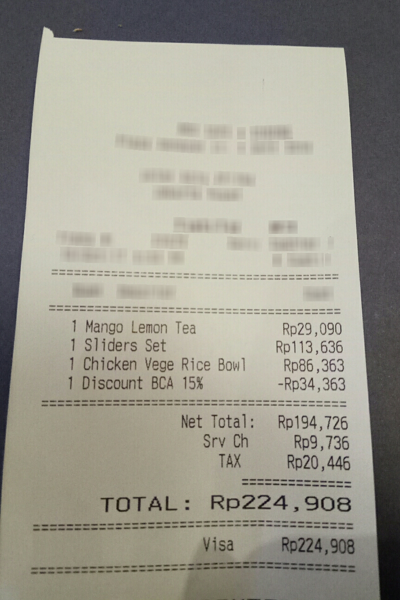

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PREDICTIONS:

{'menu': [{'cnt': '1', 'nm': 'Mango Lemon Tea', 'price': 'Rp 29,090'},
          {'cnt': '1', 'nm': 'Sliders Set', 'price': 'Rp 113,636'},
          {'cnt': '1', 'nm': 'Chicken Vege Rice Bowl', 'price': 'Rp 86,363'},
          {'cnt': '1', 'nm': 'Discount BCA 15%', 'price': '- Rp 34,363'}],
 'sub_total': {'subtotal_price': 'Rp.9,090', 'tax_price': 'Rp 224,908'},
 'total': {'menuqty_cnt': 'Visa Rp 224,908', 'total_price': 'Rp 224,908'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
GROUND TRUTH:

{'menu': [{'cnt': '1', 'nm': 'Mango Lemon Tea', 'price': '29,090'},
          {'cnt': '1', 'nm': 'Sliders Set', 'price': '113,636'}

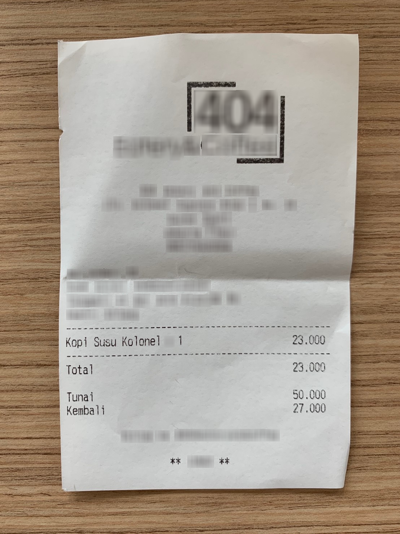

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PREDICTIONS:

{'menu': {'cnt': '1', 'nm': 'Kopi Susu Kolonel', 'price': '23.000'},
 'total': {'cashprice': '50.000',
           'changeprice': '27.000',
           'total_price': '23.000'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
GROUND TRUTH:

{'menu': {'cnt': '1', 'nm': 'Kopi Susu Kolonel', 'price': '23.000'},
 'total': {'cashprice': '50.000',
           'changeprice': '27.000',
           'total_price': '23.000'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [9]:
example_indices = np.random.randint(0, len(dataset), 5)
samples = dataset.select(example_indices)
images, ground_truths = samples["image"], samples["ground_truth"]
predictions = predictor.predict(images)

for i, (image, prediction, ground_truth) in enumerate(zip(images, predictions, ground_truths)):
    print(dash_line)
    print("Example", i+1)
    visualize_data(image, prediction, ground_truth)